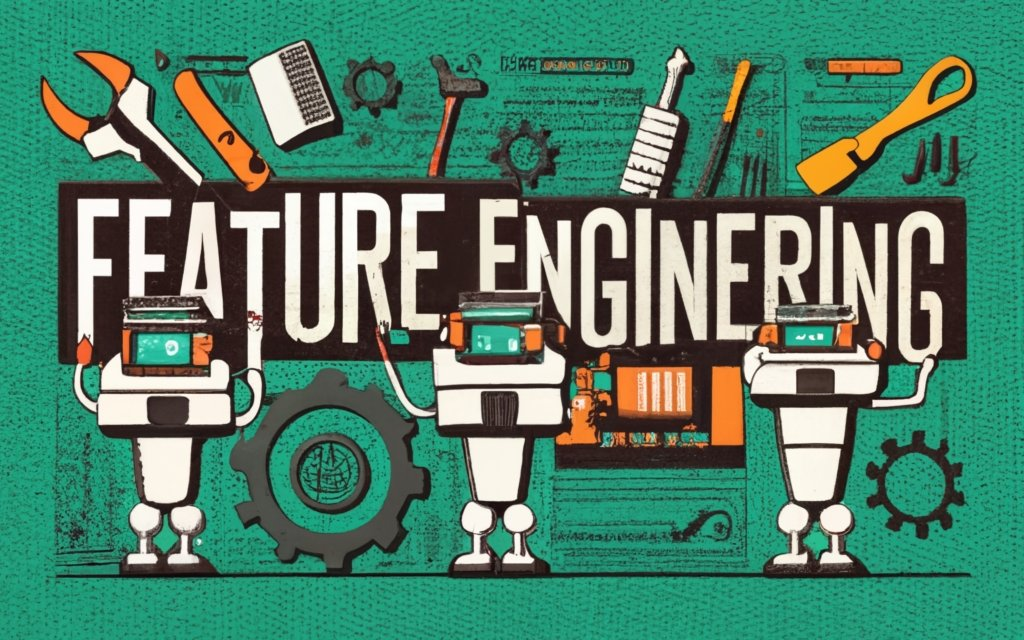

### Feature Engineering Part 2: Exploring Advanced Tecnhiques

5.Feature Transformation

    - Undestanding QQPlot and PP-Plot
    - logarithmic transformation
    - reciprocal transformation
    - square root transformation
    - exponential transformation 
    - boxcox transformation


6.Using Column Transformer to speed up FE


7.Using Pipelines to automate the FE
  - What are Pipelines
  - Accessing individual steps in pipeline
  - Accessing Parameters in Pipeline
  - Performing Grid Search with Pipeline
  - Combining Transformers and Pipeline
  - Visualizing the Pipeline

### 5. Feature Transformation

When we plan to transform data, we assume a distribution and then we fit the distribution to our data, then we have statistical tests like chi-square and f-tests to get the goodness of fit, however there are also probability plots such as  **QQ-Plot** and **PP-Plot** to observe how well the data is fit to the distribution.

### QQ-Plot

- Graph of the  qi-quantile of a fitted distribution versus the qi-quantile of the sample distribution.


- If both quantile matches, then we will get a nice 45 degrees line, how far the points away the points from the line will tell us how good of a fit the plot is.


- If the points are close to the line, then we can say that they are of a good fit, if the points are too far away then it means that the distribution doesn’t match!!

### PP-Plot

- Probability Probability Plot, A graph of model probability againist the sample probability.


- The interpretation is pretty much same as the qqplot.

**Note:** 
1. qqplot checks if the distribution is fitting well on the tail regions.
2. ppplot checks if the distribution is fitting well on the center regions.

In [15]:
#Importing the required statistical packages to plot qqplot and ppplot
import scipy.stats as stats
import statsmodels.api as sm

In [16]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
### fillnan
df['Age']=df['Age'].fillna(df['Age'].median())

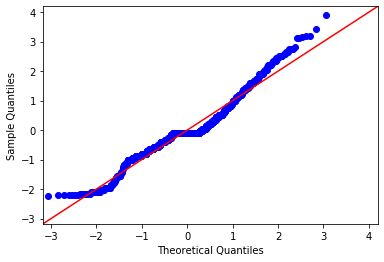

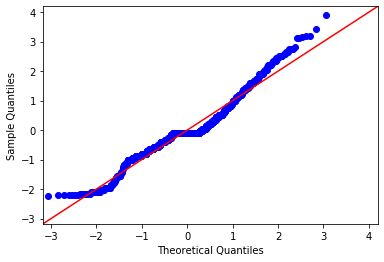

In [18]:
sm.qqplot(df['Age'], stats.norm, fit=True, line='45')

In [19]:
#### Histplot, QQplot and pp-plot
import matplotlib.pyplot as plt
import pylab 
def plot_data(df,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

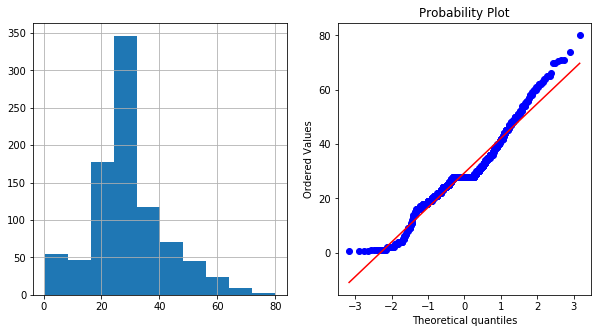

In [20]:
plot_data(df,'Age')

#### Logarithmic Transformation

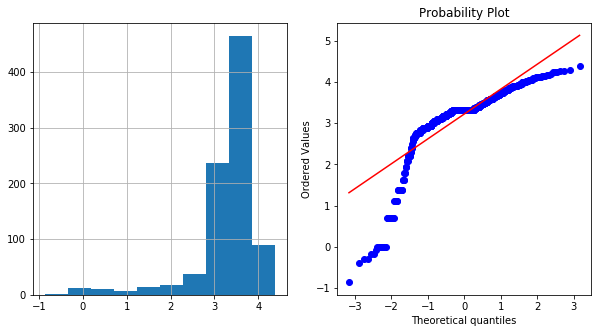

In [21]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

We can see that the a lot of points are not close to the line, which signifies this is not of log distribution.

#### Reciprocal Trnasformation

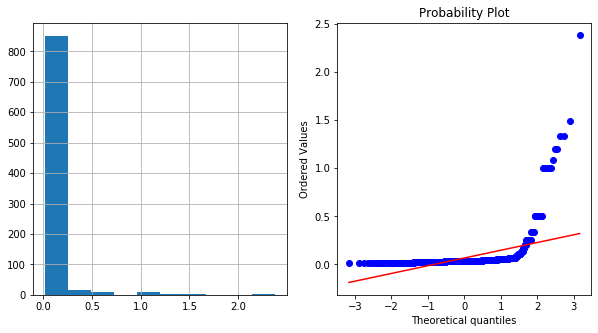

In [22]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

#### Square Root Transformation

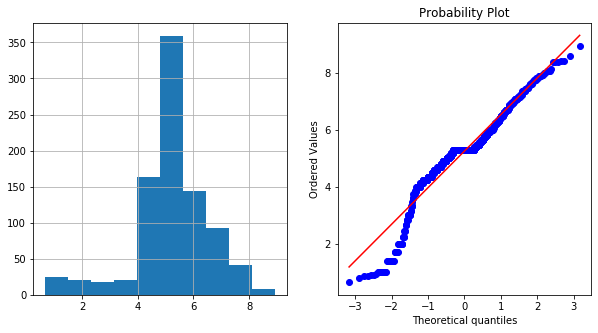

In [23]:
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

#### Exponential Transdormation

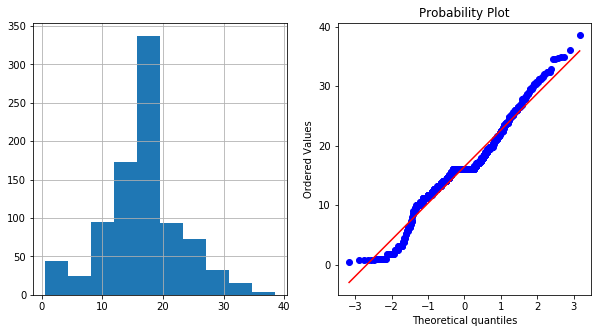

In [24]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

We can observe that the points are very close to the line comparing to any other distribution. so we can say, this can be of exponential distribution.

#### BoxCOx Transformation
The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

In [25]:
df['Age_Boxcox'],parameters=stats.boxcox(df['Age'])

In [26]:
print(parameters)

0.7964531473656952


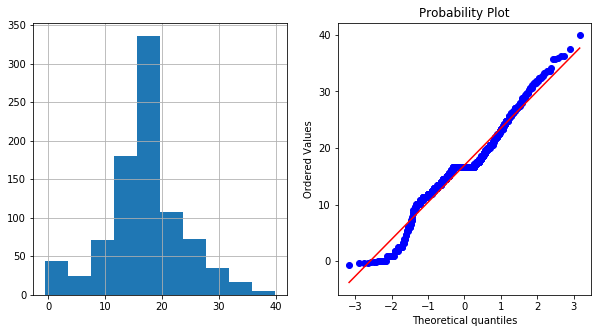

In [27]:
plot_data(df,'Age_Boxcox')

### 6. Using Composite Transformers to speed up FE

- Transformers are algorithms or tools that are used to preprocess, modify, or create new representations of data. The ones we have seen so far are called transformers, like the StandardScaler, OneHotEncoding etc.  Transformers can perform a variety of operations, including scaling, encoding, imputing missing values, and generating new features. 


- We know that generally training data contains diverse features such as numeric and categorical. And different feature types are processed with different transformers.


- And **to combine those individual transformers**, we use Composite Transformers.

### Column Transformer

- Imagine you have a table with different types of information like numbers, categories, and so on. A ColumnTransformer is like a smart worker who can handle each type of information in the table differently.


- For instance, let's say you have columns for people's ages, their jobs, and their education levels. You might want to do different things to each of these types of data. Maybe you want to scale the ages so they all have a similar impact. You might also want to turn the different jobs and education levels into numbers so the computer can understand them better.


- A ColumnTransformer is like a helpful friend who can take care of each of these tasks automatically. You tell the ColumnTransformer what to do with each column, and it does the job for you. So you don't have to worry about doing each task separately. 


- To implement this we can use `ColumnTransformer` API from sklearn.compose module

In [28]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create a sample dataset
data = {'age': [30, 40, 35, 25, 32],
        'gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
        'income': [50000, 75000, 100000, 40000, 60000]}

df = pd.DataFrame(data)

df

,age,gender,income
0,30,Male,50000
1,40,Female,75000
2,35,Male,100000
3,25,Female,40000
4,32,Male,60000


In [29]:
# Define the transformations for different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age','income']),
        ('cat', OneHotEncoder(), ['gender'])
    ])

# Apply the transformations to the dataset
transformed_df = preprocessor.fit_transform(df)
transformed_df

array([[-0.47961646, -0.71509694,  0.        ,  1.        ],
       [ 1.51878546,  0.47673129,  1.        ,  0.        ],
       [ 0.5195845 ,  1.66855953,  0.        ,  1.        ],
       [-1.47881742, -1.19182824,  1.        ,  0.        ],
       [-0.07993608, -0.23836565,  0.        ,  1.        ]])

- So if you observe here, age and income are scaled with standard scaler and gender is scaled with onehot encoder all with one single transformer that we created. 

- So, for the testing data, we don't have to apply each and every transformer seperately, we can just apply this one alone.

### 7. Using Pipelines to Automate FE

The `sklearn.pipeline` module provides utilities to build a composite estimator, as a chain of transformers and estimators.

- **Pipeline:** Constructs a chain of multiple transformers to execute a fixed sequence of steps in data preprocessing and modelling.


- **FeatureUnion:** Combines output from several transformer objects by creating a new transformer from them.


### Pipelines

- The purpose of the pipeline is to automate the process of sequentially applying a list of transformers and a final estimator, allowing for a more efficient and organized workflow in machine learning tasks.


- So usually it is used like intermediate steps as transformers, and the final step as estimator.


- Pipeline() method will take a list of (estimator_name,estimator()) tuples.

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Model Training
clf = SVC()
clf.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9333333333333333


So, IF you observe above, we had to do few data processing steps as

- Create standard scaler and fit and transform it with training data, and apply it for test data.


- Create PCA to reduce Dimensions and fit and transform it with training data, and apply it for test data.


- Create Model and fit and predict with the model.

Now, all these steps can be combined and used seamlessly with pipelines as follows:

In [31]:
from sklearn.pipeline import Pipeline

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Data preprocessing - Feature scaling
    ('pca', PCA(n_components=2)),  # Data preprocessing - Dimensionality reduction
    ('classifier', SVC())  # Model training - Support Vector Classifier
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9333333333333333


- Here, Just by giving Pipe.fit it applies all the things as scaling, dimensionality reduction and model fitting.


- Then during pipe.predict, it wil apply these to test data, very simple, right?


- Similarly, you can add many more transformer as you want.


### Access Individual steps in pipeline

- YOu can also access the individual steps easily in various ways, say if i want to access pca estimator from above pipeline.

1. pipe.named_steps.pca
2. pipe.steps[1]
3. pipe[1]
4. pipe['pca']

### Accessing parameters of each step in Pipeline

Parameters of the estimators in the pipeline can be accessed using the `estimator__parametername`. You can set all the parameter values at once using `.set_params()`

In [32]:
# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Data preprocessing - Feature scaling
    ('pca', PCA()),  # Data preprocessing - Dimensionality reduction
    ('classifier', SVC())  # Model training - Support Vector Classifier
])

pipe.set_params(pca__n_components = 2)

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9333333333333333


### Performing Grid Search with Pipeline

By using naming convention of nested parameters, grid search can implemented

In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Data preprocessing - Feature scaling
    ('pca', PCA()),  # Data preprocessing - Dimensionality reduction
    ('classifier', SVC())  # Model training - Support Vector Classifier
])

# Define the hyperparameter grid
param_grid = {
    'pca__n_components': [2, 3, 4],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [0.1, 0.01, 0.001],
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')


Best parameters: {'classifier__C': 1, 'classifier__gamma': 0.1, 'pca__n_components': 3}
Accuracy: 1.0


So, the given parameters each combination will be checked, and the best accuracy one will be fit to the model.

you can get the best parameters by using `.best_params_` method for your created grid object.

### Combining Transformers and Pipelines

- sklearn.pipeline.FeatureUnion concatenates results of multiple transformer objects. 

- Applies a list of transformer objects in parallel, and their outputs are concatenated side-by-side into a larger matrix.

In [34]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data (using a sample dataset for demonstration)
X = pd.read_csv('titanic.csv',usecols=['Fare','Age','Sex','Embarked'])
y = pd.read_csv('titanic.csv',usecols=['Survived'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Numeric Pipeline
numeric_pipeline = ColumnTransformer([
    ('imputer', SimpleImputer(strategy='mean'),['Age']),
    ('scaler', StandardScaler(),['Age','Fare'])
])

# Column Transformer for Categorical Features
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Feature Union
full_pipeline = FeatureUnion([
    ('numeric_pipeline', numeric_pipeline),
    ('categorical_transformer', categorical_transformer)
])

# Fit the pipeline on the training data
full_pipeline.fit(X_train, y_train)

FeatureUnion(transformer_list=[('numeric_pipeline',
                                ColumnTransformer(transformers=[('imputer',
                                                                 SimpleImputer(),
                                                                 ['Age']),
                                                                ('scaler',
                                                                 StandardScaler(),
                                                                 ['Age',
                                                                  'Fare'])])),
                               ('categorical_transformer',
                                Pipeline(steps=[('imputer',
                                                 SimpleImputer(strategy='most_frequent')),
                                                ('onehot',
                                                 OneHotEncoder(handle_unknown='ignore'))]))])

1. The numeric_pipeline has two steps:
   - SimpleImputer: This step imputes missing values in the numeric features using the mean value.
   - StandardScaler: This step scales the numeric features to have a mean of 0 and a standard deviation of 1.


2. The categorical_transformer has two steps:

   - SimpleImputer: This step imputes missing values in the categorical features using the most frequent value.
   - OneHotEncoder: This step one-hot encodes the categorical features, which means that it creates a new binary feature for each unique category in each categorical feature.
   
   
3. The FeatureUnion pipeline then combines the output of the numeric_pipeline and the categorical_transformer into a single feature matrix. This feature matrix can then be used to train a machine learning model.

### Visualizing the Pipeline

In [35]:
from sklearn import set_config
set_config(display='diagram')
full_pipeline

FeatureUnion(transformer_list=[('numeric_pipeline',
                                ColumnTransformer(transformers=[('imputer',
                                                                 SimpleImputer(),
                                                                 ['Age']),
                                                                ('scaler',
                                                                 StandardScaler(),
                                                                 ['Age',
                                                                  'Fare'])])),
                               ('categorical_transformer',
                                Pipeline(steps=[('imputer',
                                                 SimpleImputer(strategy='most_frequent')),
                                                ('onehot',
                                                 OneHotEncoder(handle_unknown='ignore'))]))])

This is my Entire Feature Engineering Learnings. Hope this Helps! Happy Learning :)